In [136]:
import matplotlib.pyplot as plt

import torch

# One sided distribution: importance calculation

Domains A and B contain digits with class [0-9]. They have have the following distributions:

In [175]:
p_A = torch.Tensor([0.05, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
p_A /= p_A.sum()

p_B = torch.Tensor([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
p_B /= p_B.sum()

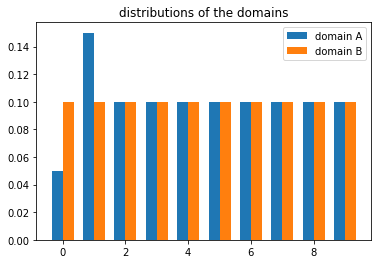

In [176]:
width = 0.35

plt.title('distributions of the domains')
plt.bar(torch.arange(10) - width/2, p_A, width)
plt.bar(torch.arange(10) + width/2, p_B, width)
plt.legend(['domain A', 'domain B'])
plt.show()

The multiplication factor for each of the classes for domain A is as following:

In [199]:
m = p_B / p_A

print(m.view(-1,1))
print()
print('sum:', m.sum().item())

tensor([[2.0000],
        [0.6667],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

sum: 10.666666030883789


### Normalization
The importances have to sum up to 1 so that we can weight or sample.

The problem I am facing here is that I don't know how to properly normalize: 
* The sum of the multiplication factor is more than 10, meaning that applying softmax or deviding by the sum results in the classes 2-9 getting lower importance even though they should be unaffected.
* Using softmax normalization or dividing by the sum results in the correction not being accurate.

In [230]:
softmax = torch.nn.Softmax(0)
softmax_nm = softmax(m)

sum_nm = m/m.sum()

len_nm = m/len(m)


softmax_nm, sum_nm, len_nm

(tensor([0.2377, 0.0627, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875,
         0.0875]),
 tensor([0.1875, 0.0625, 0.0938, 0.0938, 0.0938, 0.0938, 0.0938, 0.0938, 0.0938,
         0.0938]),
 tensor([0.2000, 0.0667, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]))

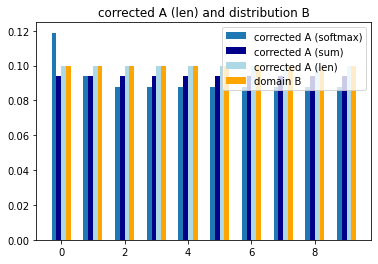

In [255]:
width = 0.15

plt.title('corrected A (len) and distribution B')
plt.bar(torch.arange(10) - 1.5*width, softmax_nm * p_A * 10, width)
plt.bar(torch.arange(10) - width/2, sum_nm * p_A * 10, width, color='darkblue')
plt.bar(torch.arange(10) + width/2, len_nm * p_A * 10, width, color='lightblue')
plt.bar(torch.arange(10) + 1.5*width, p_B, width, color='orange')

plt.legend(['corrected A (softmax)', 'corrected A (sum)', 'corrected A (len)', 'domain B'])
plt.show()

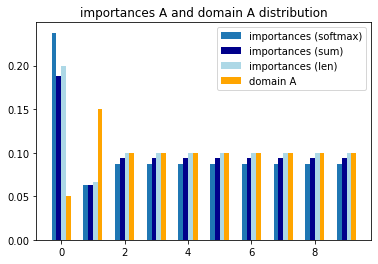

In [261]:
width = 0.15

plt.title('importances A and domain A distribution')
plt.bar(torch.arange(10) - 1.5*width, softmax_nm, width)
plt.bar(torch.arange(10) - width/2, sum_nm, width, color='darkblue')
plt.bar(torch.arange(10) + width/2, len_nm, width, color='lightblue')
plt.bar(torch.arange(10) + 1.5*width, p_A, width, color='orange')

plt.legend(['importances (softmax)', 'importances (sum)', 'importances (len)', 'domain A'])
plt.show()

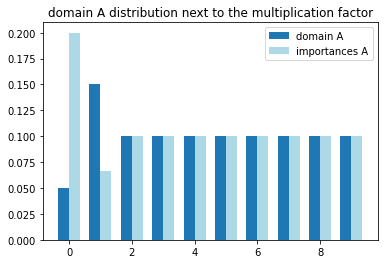

In [215]:
width = 0.35

plt.title('domain A distribution next to the multiplication factor')
plt.bar(torch.arange(10) - width/2, p_A, width)
plt.bar(torch.arange(10) + width/2, len_nm, width, color='lightblue')
plt.legend(['domain A', 'importances A'])
plt.show()

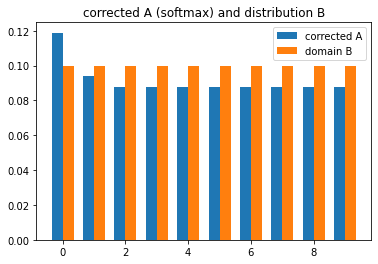

In [219]:
width = 0.35

plt.title('corrected A (softmax) and distribution B')
plt.bar(torch.arange(10) - width/2, softmax_nm * p_A * 10, width)
plt.bar(torch.arange(10) + width/2, p_B, width)

plt.legend(['corrected A', 'domain B'])
plt.show()

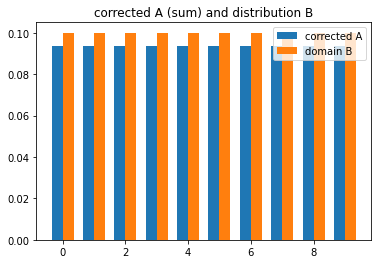

In [221]:
width = 0.35

plt.title('corrected A (sum) and distribution B')
plt.bar(torch.arange(10) - width/2, sum_nm * p_A * 10, width)
plt.bar(torch.arange(10) + width/2, p_B, width)

plt.legend(['corrected A', 'domain B'])
plt.show()

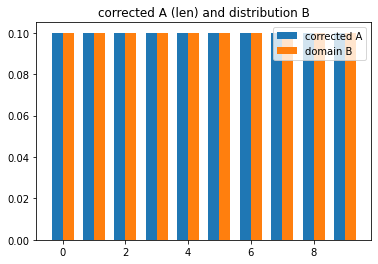

In [226]:
width = 0.35

plt.title('corrected A (len) and distribution B')
plt.bar(torch.arange(10) - width/2, len_nm * p_A * 10, width)
plt.bar(torch.arange(10) + width/2, p_B, width)

plt.legend(['corrected A', 'domain B'])
plt.show()